# Mushroom Classification - AI Essentials 2025 Assignment

![Mushrooms](src/mushrooms.png)

## Basis information

### Author: Benjumea Moreno, Juan

### Assignment:
#### Goal:  
Predict whether a mushroom is **poisonous** or **edible**.

#### Parameters: 
Physical characteristics. The dataset is provided in the accompanying file 'mushroom.csv'. A full description of the data set can be found in the file 'metadata.txt'.

#### Basic requirements:
- Define the problem, analyze the data, and prepare the data for your model.
- Train at least 3 models (e.g., decision trees, nearest neighbour, ...) to predict whether a mushroom is poisonous or edible. Motivate choices.
- Optimize the model parameters settings.
- Compare the best parameter settings for the models and estimate their errors on unseen data. Investigate the learning process critically (overfitting/underfitting). 

#### Optional extensions:
- Build and host an API for your best performing model.
- Try to combine multiple models.
- Investigate whether all features are necessary to produce a good model.

### The dataset

#### Basic info

Classification Mushroom Data 2020: improvement and extension of the UC Irvine 1987 Mushroom Data Set. 

Primary data contains 173 mushroom species, secondary data 61069 hypotetical mushrooms based on those species. 

20 features, three quantitative and 17 categorical, 2 classes (poisonous or edible).

#### Features

##### Quantitative

- cap-diameter: float number in cm
- stem-height: float number in cm
- stem-width: float number in mm

##### Categorical

**Related to cap**
- cap-shape: ['bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken']
- cap-surface: ['fibrous', 'grooves', 'scaly', 'smooth', 'shiny', 'leathery', 'silky', 'sticky', 'wrinkled', 'fleshy']
- cap-color: ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow', 'orange', 'black']

**Related to gill**

- gill-attachment: ['adnate', 'adnexed', 'decurrent', 'free', 'sinuate', 'pores', 'none', 'unknown']
- gill-spacing: ['close', 'distant', 'none']
- gill-color: ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow', 'orange', 'black']

**Related to stem**
- stem-root: ['bulbous', 'swollen', 'club', 'cup', 'equal', 'rhizomorphs', 'rooted']
- stem-surface: ['fibrous', 'grooves', 'scaly', 'smooth', 'shiny', 'leathery', 'silky', 'sticky', 'wrinkled', 'fleshy']

**Related to veil**

- veil-type: ['partial', 'universal']
- veil-color: ['brown', 'buff', 'cinnamon', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow', 'black']

**Related to ring**

- has-ring: ['yes', 'no']
- ring-type: ['evanescent', 'flaring', 'large', 'none', 'pendant']

**Miscellaneous**
- does-bruise-or-bleed: ['bruises-or-bleeding', 'no']
- spore-print-color: ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow']
- habitat: ['grasses', 'leaves', 'meadows', 'paths', 'heaths', 'urban', 'waste', 'woods']
- season: ['spring', 'summer', 'autumn', 'winter']


### Approach

1. Imports, Exploratory Data Analysis and Preprocessing
2. Create helper functions: pipeline creation, grid search, and learning curve
3. Train, tune and evaluate models
4. Extra analysis: feature selection and model combination
4. Conclusions

## 1. Imports, Exploratory Data Analysis and Preprocessing

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# import preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# import classifiers
from sklearn.linear_model import LogisticRegression as lr, SGDClassifier as sgd

from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import ExtraTreesClassifier as et

import xgboost as xgb
from catboost import CatBoostClassifier as cb
from lightgbm import LGBMClassifier as lgb

# hyperparameter tuning en model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# ensembles en feature selection
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFECV


In [2]:
# import the data
mushroom = pd.read_csv("./data/mushroom.csv", sep=";")

### 1.1. Basic data cleanup

In [3]:
mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
# convert class to numeric values 0 edible and 1 poisonous
mushroom["class"] = mushroom["class"].map({"e": 0, "p": 1})

In [5]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [6]:
feature_cols = mushroom.columns.drop("class")
# convert object columns to categorical
categorical_columns = mushroom.select_dtypes(include=["object"]).columns
mushroom[categorical_columns] = mushroom[categorical_columns].apply(
    lambda col: col.astype("category")
)


In [7]:
# missing values
mushroom.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [8]:
# drop columns met teveel missings values
drop_cols = [
    "stem-root",
    "veil-type",
    "veil-color",
    "spore-print-color",
    "stem-surface",
]
mushroom = mushroom.drop(columns=drop_cols)

In [9]:
# statistics voor numerische kolommen
mushroom.describe()

,class,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000,61069.000000
mean,0.554913,6.733854,6.581538,12.149410
std,0.496979,5.264845,3.370017,10.035955
min,0.000000,0.380000,0.000000,0.000000
25%,0.000000,3.480000,4.640000,5.210000
50%,1.000000,5.860000,5.950000,10.190000
75%,1.000000,8.540000,7.740000,16.570000
max,1.000000,62.340000,33.920000,103.910000


In [10]:
# Count of zeros in each column
zero_counts = (mushroom[["cap-diameter", "stem-height", "stem-width"]] == 0).sum()
print(zero_counts / len(mushroom) * 100)

cap-diameter    0.000000
stem-height     1.734104
stem-width      1.734104
dtype: float64


In [11]:
# 0 hoogte en breedte kan niet dus droppen van de dataset
mushroom = mushroom[(mushroom["stem-height"] != 0) & (mushroom["stem-width"] != 0)]
print(mushroom.shape)

(60010, 16)


### 1.2. Exploratory Data Analysis

In [12]:
feature_cols = mushroom.columns.drop("class")
numerical_cols = [col for col in feature_cols if mushroom[col].dtype == "float64"]
categorical_cols = [col for col in feature_cols if mushroom[col].dtype == "category"]

#### Correlatie analyse

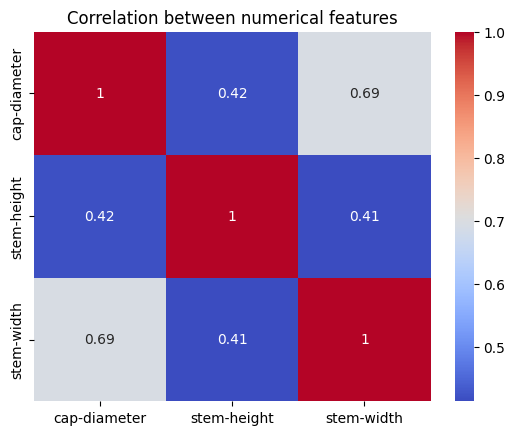

In [13]:
# checken of er correlatie is tussen de features
corr_matrix = mushroom[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between numerical features")
plt.show()

Conclusie: grote correlatie tussen cap-diameter en stem-width. 
Kunnen misschien gebruikt worden voor feature engineering.

#### Class distribution

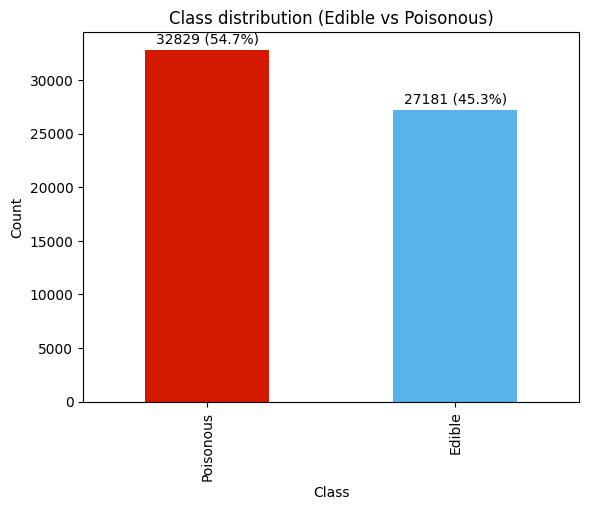

In [14]:
# balance between edible and poisonous mushrooms
counts = mushroom["class"].value_counts()
percentages = counts / counts.sum() * 100

colors = ["#56B4E9" if x == 0 else "#D51900" for x in counts.index]

label_map = {0: "Edible", 1: "Poisonous"}
labels = [label_map[x] for x in counts.index]

ax = counts.plot(
    kind="bar", title="Class distribution (Edible vs Poisonous)", color=colors
)

ax.set_xticklabels(labels)

for i, (v, p) in enumerate(zip(counts, percentages)):
    ax.text(i, v + counts.max() * 0.01, f"{v} ({p:.1f}%)", ha="center", va="bottom")

plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Evenwichtige verdeling van de classes, geen nood om oversampling.

#### Analyse van categorische kolommen om idee te hebben van feature importance 

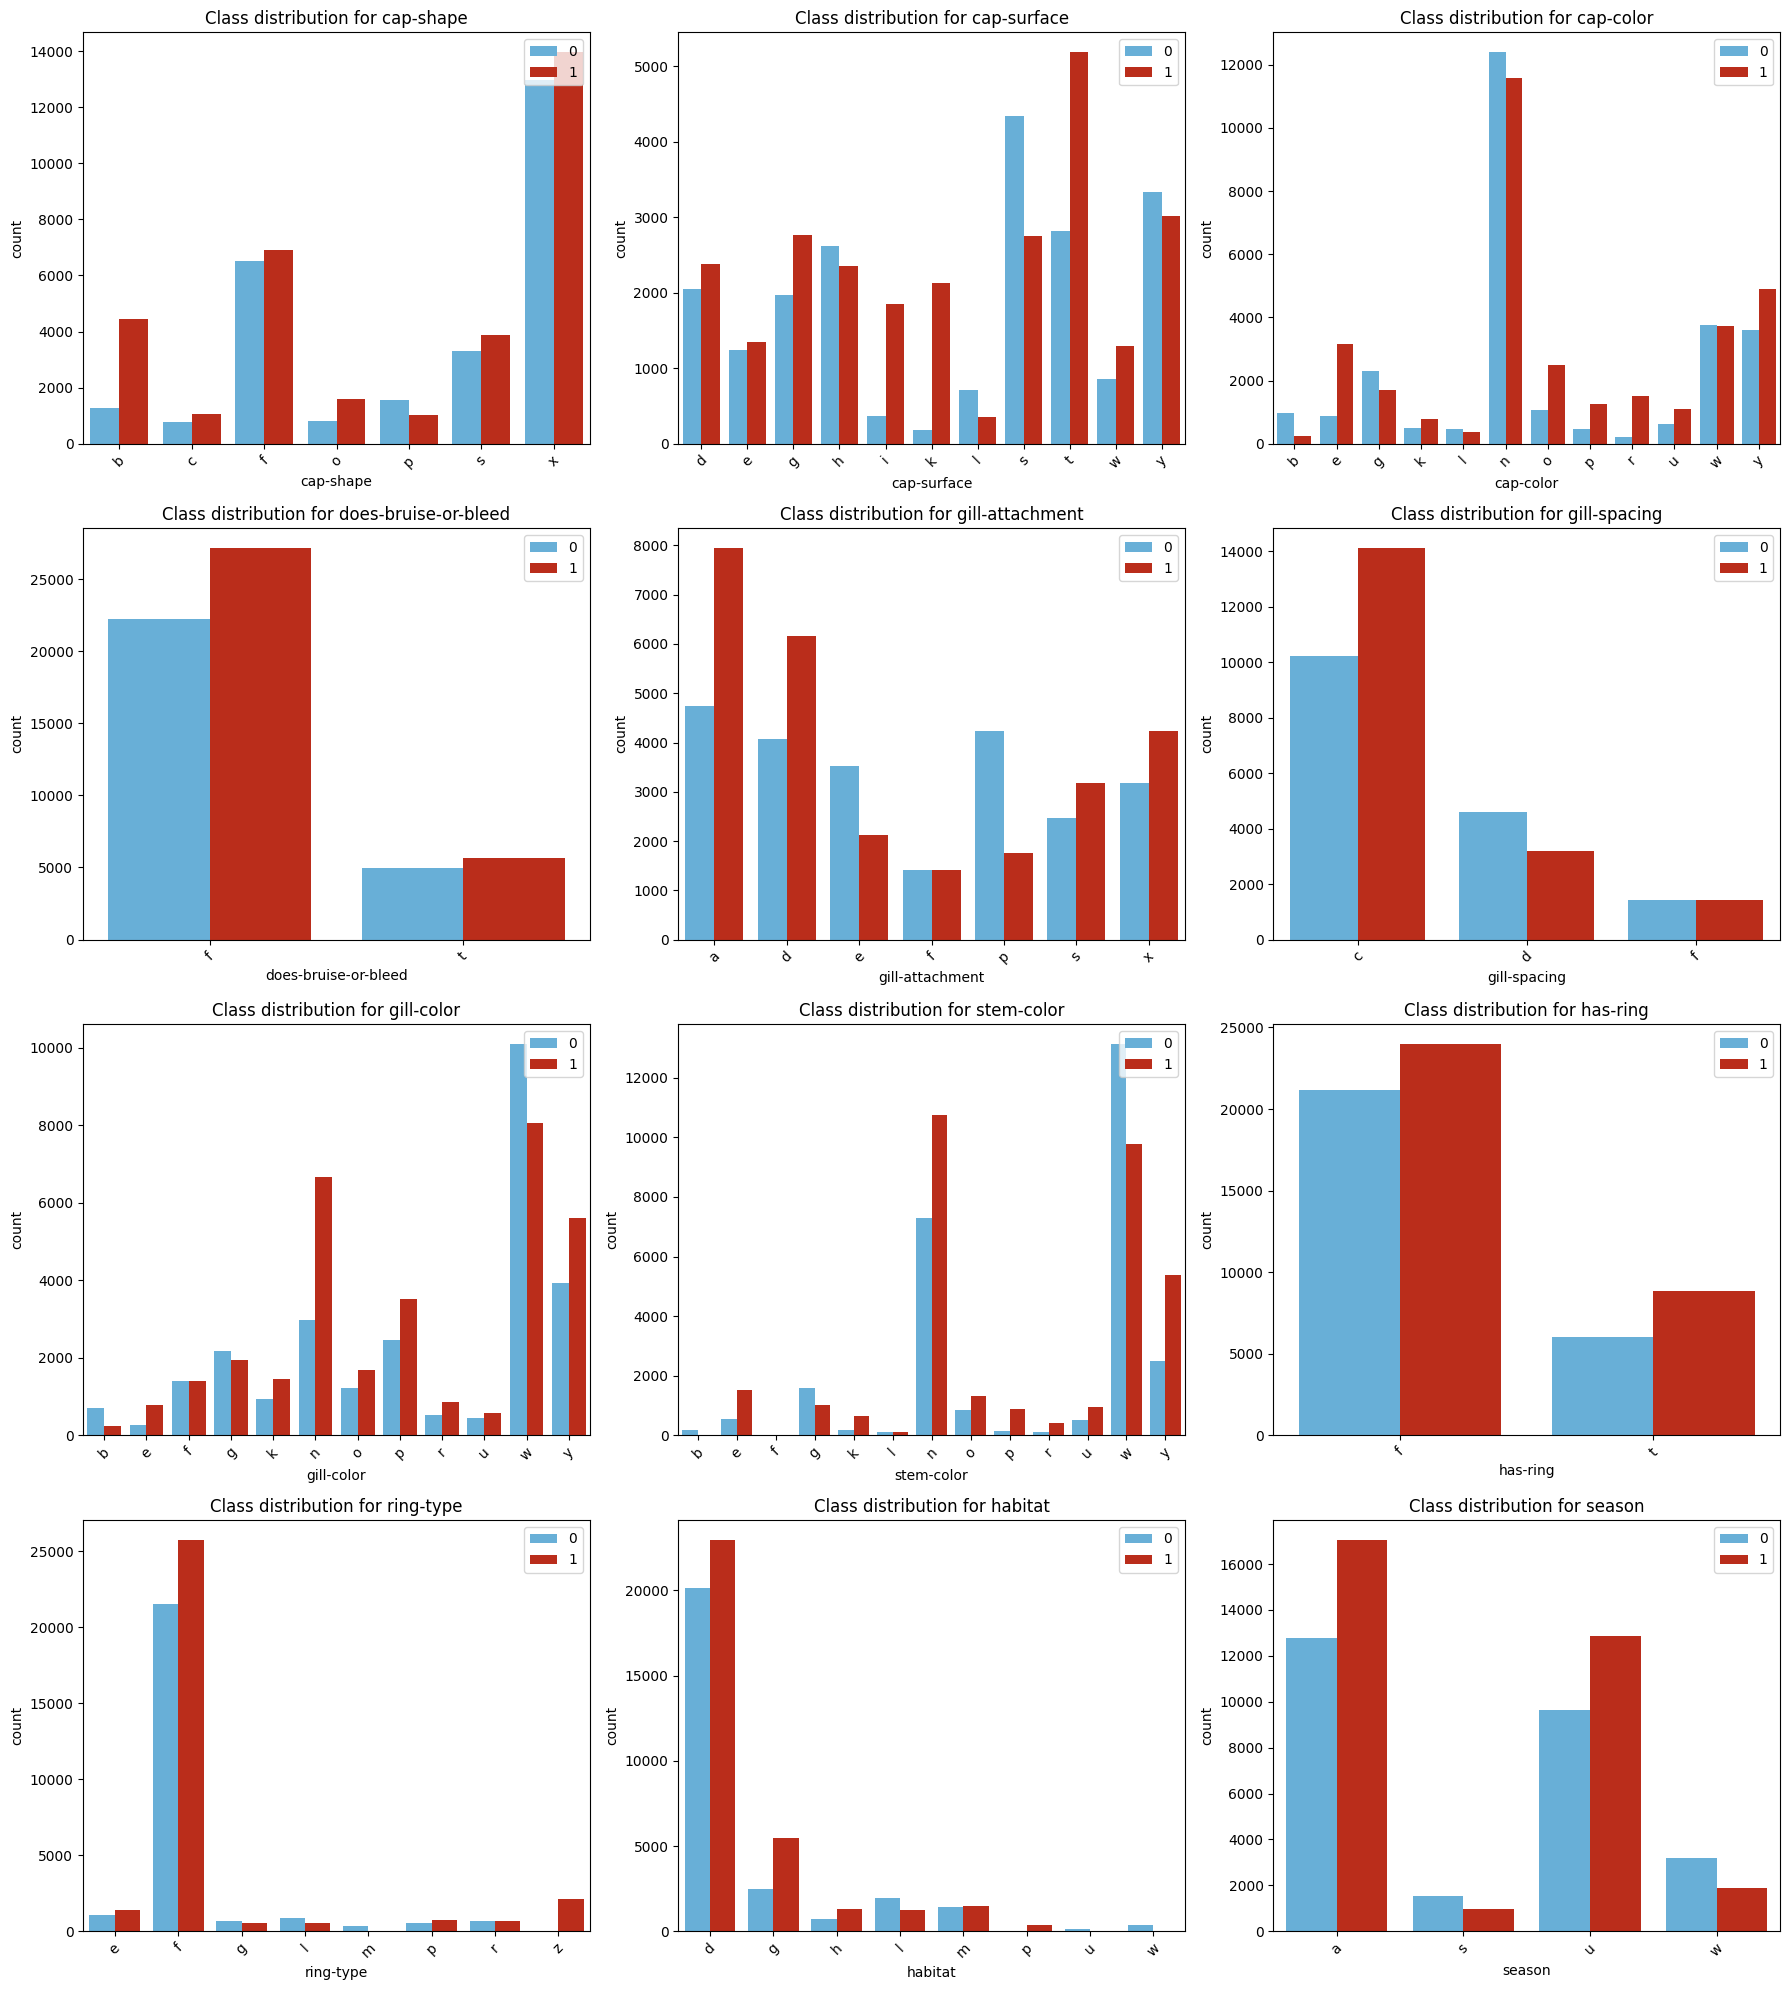

In [15]:
# categorische kolommen plotten om idee te hebben van feature importance
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

palette = ["#56B4E9", "#D51900"]

for i, col in enumerate(categorical_cols):
    sns.countplot(data=mushroom, x=col, hue="class", palette=palette, ax=axes[i])
    axes[i].set_title(f"Class distribution for {col}")
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].legend(loc="upper right")
plt.tight_layout()
plt.show()

**Tussenconclusie:**
Twee nuttige punten om te onderzoeken:

1. **Klassen hebben een onevenwichtige verdeling bij aantal categorieën**: Aantal categorieën hebben onevenwicht tussen klassen: bv bij gill attachment, gill spacing, gill color en cap surface. Kunnen goede predictoren zijn.

2. **Onevenwichige verdeling onder categorieën bij bepaalde feaures** Van sommige categorieën zijn er heel weinig samples: bv bij ring type, habitat, stem color of cap color. Groepering misschien aangewezen. Er zijn ook bepaalde categorieën die heel dominant zijn, bijna alle samples van eenzelfde categorie. Heeft het predictieve waarde?

Aangewezen om een aantal basis statistische analyses uit te voeren om dit verder te onderzoeken. Zullen het doen op basis van twee metrics:

- Gewogen klasse-onevenwicht per feature: *weighted average class separation*
- Category imbalance binnen feature met gini-coefficiënt: *category gini*

In [16]:
def gini(array):
    """Compute Gini coefficient of array of counts."""
    array = np.array(array, dtype=np.float64)
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)  # Values cannot be negative
    array += 1e-9  # Prevent division by zero if array sums to zero
    array = np.sort(array)
    n = len(array)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

In [17]:
dominance_summary = {}

for col in categorical_cols:
    # groeperen per categorie en klasse => aantal voor elke combinatie
    counts = (
        mushroom.groupby([col, "class"], observed=True).size().unstack(fill_value=0)
    )
    # aantal samples per categorie
    category_counts = counts.sum(axis=1)

    class_proportions = counts.div(
        counts.sum(axis=1), axis=0
    )  # normalize per row (category)
    max_percent_per_category = class_proportions.max(axis=1)  # max class % per category

    # Weighted average class Gini (weighted by category size)
    weighted_avg_class_separation = (
        max_percent_per_category * category_counts / category_counts.sum()
    ).sum()

    # Gini of category sizes (imbalance between categories)
    category_gini = gini(category_counts.values)

    dominance_summary[col] = {
        "weighted_avg_class_separation": weighted_avg_class_separation,
        "category_gini": category_gini,
    }

# Convert to DataFrame for easy viewing
dominance_df = pd.DataFrame(dominance_summary).T
dominance_df = dominance_df.sort_values(
    by="weighted_avg_class_separation", ascending=False
)

# Display result
pd.set_option("display.max_rows", None)  # if you want to show all features
print(dominance_df)

                      weighted_avg_class_separation  category_gini
stem-color                                 0.615297       0.659707
cap-surface                                0.608760       0.294534
gill-attachment                            0.608392       0.229714
gill-color                                 0.592785       0.492343
cap-color                                  0.584519       0.532956
season                                     0.578287       0.414023
gill-spacing                               0.575758       0.410774
ring-type                                  0.566955       0.732557
habitat                                    0.566656       0.726000
cap-shape                                  0.555991       0.485295
does-bruise-or-bleed                       0.547059       0.323529
has-ring                                   0.547059       0.252941


### Conclusie:

- Enkel bij stem color, cap surface en gill attachment lijkt er een duidelijke klas-onevenwicht te zijn binnen de categorieën. 

- Ring type, habitat en stem-color worden gedomineerd door een aantal categorieën, groeperen misschien aangewezen.

In [18]:
# Features to drop or group rare in future finetuning
features_to_drop = dominance_df[
    dominance_df["weighted_avg_class_separation"] < 0.55
].index.tolist()

features_to_group_rare = dominance_df[
    dominance_df["category_gini"] > 0.65
].index.tolist()

print("Features to drop:", features_to_drop)
print("Features to group rare:", features_to_group_rare)

Features to drop: ['does-bruise-or-bleed', 'has-ring']
Features to group rare: ['stem-color', 'ring-type', 'habitat']


### 1.4 Train/Test Split 

In [19]:
# splitsen in features en target
feature_cols = [col for col in mushroom.columns if col != "class"]

X = mushroom[feature_cols]
y = mushroom["class"]

# splitsen in train en test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## 3. Helper Functions: Pipeline Creation, Grid Search, and Learning Curve

To make the notebook modular and easier to maintain, I implemented reusable functions for:
- Pipeline creation
- Hyperparameter tuning (GridSearchCV)
- Learning curve plotting

In [20]:
def create_pipeline(
    numerical_cols,
    categorical_cols,
    classifier,
    encoder_type="onehot",
    use_pca=False,
    n_components=None,
    random_state=42,
):
    """
    Builds a reusable sklearn Pipeline for preprocessing and classification.

    The pipeline applies the following steps:
    - Standard scaling for numerical features.
    - Imputation + encoding of categorical features (OneHot or Ordinal).
    - Optional PCA for dimensionality reduction.
    - Final classification using the specified classifier.

    Args:
        numerical_cols (list of str): Names of numerical features.
        categorical_cols (list of str): Names of categorical features.
        classifier (sklearn-compatible classifier): Classifier to include in the pipeline.
        encoder_type (str, optional): Encoding method for categorical features.
                                      Must be 'onehot' or 'ordinal'. Defaults to 'onehot'.
        use_pca (bool, optional): Whether to include PCA in the pipeline. Defaults to False.
        n_components (int, optional): Number of PCA components to retain (if use_pca=True). Defaults to None.
        random_state (int, optional): Random state for PCA. Defaults to 42.

    Raises:
        ValueError: If encoder_type is not 'onehot' or 'ordinal'.

    Returns:
        sklearn.pipeline.Pipeline: Configured sklearn Pipeline object.
    """

    # Kies Encoder
    if encoder_type == "onehot":
        cat_encoder = OneHotEncoder(handle_unknown="ignore")
    elif encoder_type == "ordinal":
        cat_encoder = OrdinalEncoder(
            handle_unknown="use_encoded_value", unknown_value=-1
        )
    else:
        raise ValueError(f"Unknown encoder type: {encoder_type}")

    # categorical pipeline: impute + encode
    cat_pipeline = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
            ("encoder", cat_encoder),
        ]
    )

    # numerical pipeline: scale
    num_pipeline = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
        ]
    )

    # Kies preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", num_pipeline, numerical_cols),
            ("cat", cat_pipeline, categorical_cols),
        ]
    )

    # Pipeline stappen
    steps = [("preprocessor", preprocessor)]

    # PCA optie
    if use_pca:
        steps.append(("pca", PCA(n_components=n_components, random_state=random_state)))

    if hasattr(classifier, "random_state"):
        classifier.random_state = random_state

    # Classifier toevoegen
    steps.append(("classifier", classifier))

    pipeline = Pipeline(steps=steps)

    return pipeline

In [21]:
def run_grid_search(
    pipeline,
    param_grid,
    X_train,
    y_train,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
):
    """
    Performs hyperparameter tuning using GridSearchCV.

    The function runs GridSearchCV on the provided pipeline with the specified hyperparameter grid,
    and prints the best parameters and cross-validation score.

    Args:
        pipeline (sklearn.pipeline.Pipeline): Pipeline to optimize.
        param_grid (dict): Dictionary of hyperparameters to search.
        X_train (array-like or DataFrame): Training features.
        y_train (array-like or Series): Training target.
        cv (int, optional): Number of cross-validation folds. Defaults to 5.
        scoring (str, optional): Scoring metric. Defaults to 'accuracy'.
        n_jobs (int, optional): Number of parallel jobs. Defaults to -1 (use all cores).
        verbose (int, optional): Verbosity level for GridSearchCV. Defaults to 1.

    Returns:
        tuple: (fitted GridSearchCV object, best_params (dict), best_score (float))
    """

    grid_search = GridSearchCV(
        pipeline, param_grid, cv=cv, scoring=scoring, n_jobs=n_jobs, verbose=verbose
    )
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return grid_search, best_params, best_score

In [22]:
def plot_learning_curve(
    estimator, X_train, y_train, title, cv=3, scoring="accuracy", n_jobs=-1
):
    """
    Plots the learning curve for a given estimator.

    The function computes and visualizes how the model performance evolves
    as the size of the training set increases.

    Args:
        estimator (sklearn estimator or pipeline): The model to evaluate.
        X_train (array-like or DataFrame): Training features.
        y_train (array-like or Series): Training target.
        title (str): Title of the plot.
        cv (int, optional): Number of cross-validation folds. Defaults to 5.
        scoring (str, optional): Scoring metric. Defaults to 'accuracy'.
        n_jobs (int, optional): Number of parallel jobs. Defaults to -1 (use all cores).

    Returns:
        None. Displays the learning curve plot.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X_train,
        y_train,
        cv=cv,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 5),
        n_jobs=n_jobs,
        shuffle=True,
        random_state=42,
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

## 4. Model Training and Optimization

### 4.1 Pipelines per model 
To ensure modularity and consistency, all models were built as sklearn Pipelines with preprocessing and classifier steps. 
The pipelines were stored in a dictionary for easy iteration, tuning, and evaluation.

In [23]:
# Logistic Regression
pipeline_lr = create_pipeline(
    numerical_cols,
    categorical_cols,
    classifier=lr(),
    encoder_type="onehot",
    use_pca=True,
    n_components=None,
    random_state=42,
)

# SGD
pipeline_sgd = create_pipeline(
    numerical_cols,
    categorical_cols,
    classifier=sgd(),
    encoder_type="onehot",
    use_pca=True,
    n_components=None,
    random_state=42,
)

# Random Forest
pipeline_rf = create_pipeline(
    numerical_cols,
    categorical_cols,
    classifier=rf(),
    encoder_type="ordinal",
    random_state=42,
)

# Extra Trees
pipeline_et = create_pipeline(
    numerical_cols,
    categorical_cols,
    classifier=et(),
    encoder_type="ordinal",
    random_state=42,
)

# XGBoost
pipeline_xgb = create_pipeline(
    numerical_cols,
    categorical_cols,
    classifier=xgb.XGBClassifier(eval_metric="logloss"),
    encoder_type="ordinal",
    random_state=42,
)

# CatBoost
pipeline_cb = create_pipeline(
    numerical_cols,
    categorical_cols,
    classifier=cb(),
    encoder_type="ordinal",
    random_state=42,
)

# LGBM
pipeline_lgbm = create_pipeline(
    numerical_cols,
    categorical_cols,
    classifier=lgb(),
    encoder_type="ordinal",
    random_state=42,
)

# Dict met pipelines
pipelines = {
    # linear models
    "Logistic Regression": pipeline_lr,
    "SGD": pipeline_sgd,
    # ensemble trees
    "Random Forest": pipeline_rf,
    "Extra Trees": pipeline_et,
    # boosting
    "XGBoost": pipeline_xgb,
    "CatBoost": pipeline_cb,
    "LightGBM": pipeline_lgbm,
}

### 4.2 Hyperparameters per model
To optimize each model, I defined a parameter grid for each pipeline. These grids were used in combination with GridSearchCV to find the best hyperparameters.

In [24]:
param_grids = {
    "Logistic Regression": {
        "classifier__C": [0.01, 0.1, 1.0, 10.0, 100.0],
        "classifier__solver": ["saga"],
        "classifier__max_iter": [1000],
        "pca__n_components": [5, 10, 20],
    },
    "SGD": {
        "classifier__loss": ["hinge"],  # linear SVM
        "classifier__alpha": [1e-4, 1e-3, 1e-2],  # analogous to C
        "classifier__max_iter": [1000],
        "classifier__tol": [1e-3, 1e-4],
        "pca__n_components": [5, 10, 20],
    },
    "Random Forest": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [None, 5, 10],
    },
    "Extra Trees": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [None, 5, 10],
    },
    "XGBoost": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [3, 5, 7],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
    },
    "CatBoost": {
        "classifier__iterations": [100, 200],
        "classifier__depth": [4, 6, 8],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__verbose": [0],
    },
    "LightGBM": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [5, 10, -1],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__verbose": [-1],
    },
}

### 4.3 Model training, hyperparameter tuning and evaluation
In this section, I perform hyperparameter tuning with GridSearchCV for all models, 
plot learning curves to analyze generalization performance, 
and evaluate each tuned model on the test set. 

The results are stored in a dictionary for easy comparison.

======= Logistic Regression ========
Fitting 5 folds for each of 15 candidates, totalling 75 fits


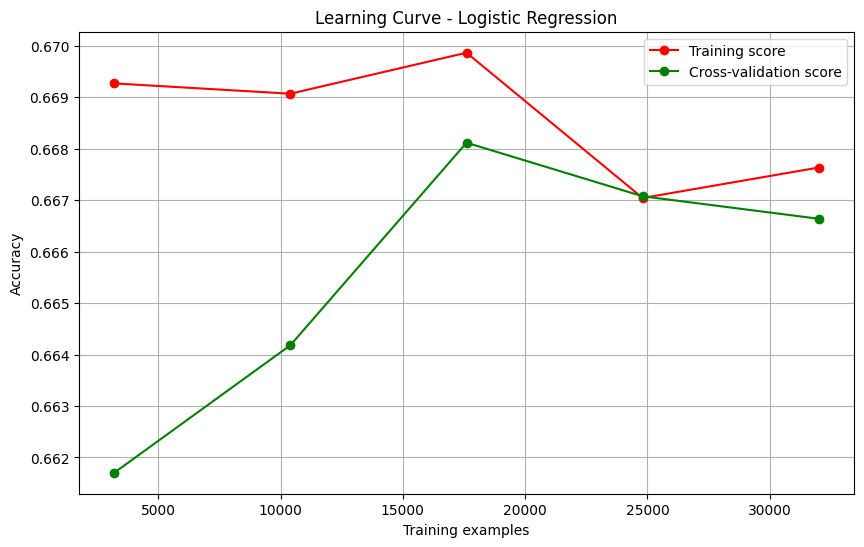

Test Accuracy Logistic Regression: 0.667305449091818
              precision    recall  f1-score   support

           0       0.65      0.57      0.61      5436
           1       0.68      0.75      0.71      6566

    accuracy                           0.67     12002
   macro avg       0.66      0.66      0.66     12002
weighted avg       0.67      0.67      0.66     12002


======= SGD ========
Fitting 5 folds for each of 18 candidates, totalling 90 fits


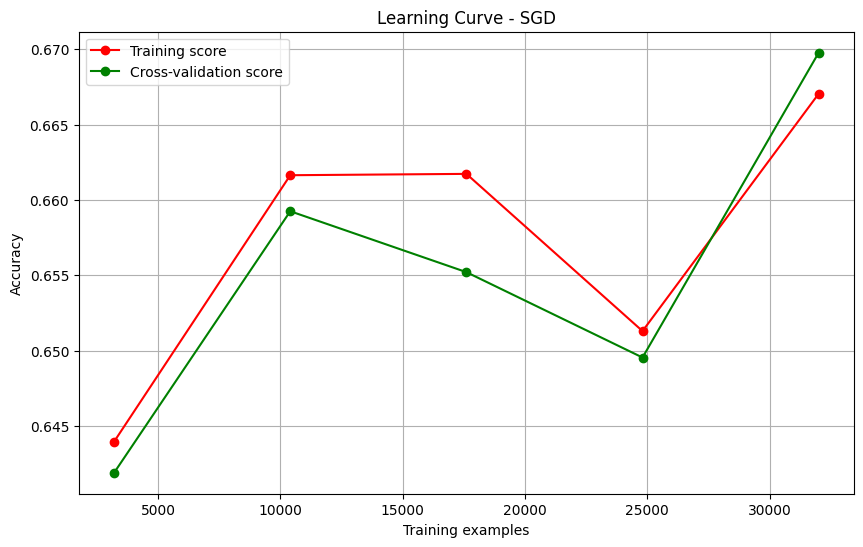

Test Accuracy SGD: 0.6605565739043493
              precision    recall  f1-score   support

           0       0.64      0.59      0.61      5436
           1       0.68      0.72      0.70      6566

    accuracy                           0.66     12002
   macro avg       0.66      0.65      0.65     12002
weighted avg       0.66      0.66      0.66     12002


======= Random Forest ========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


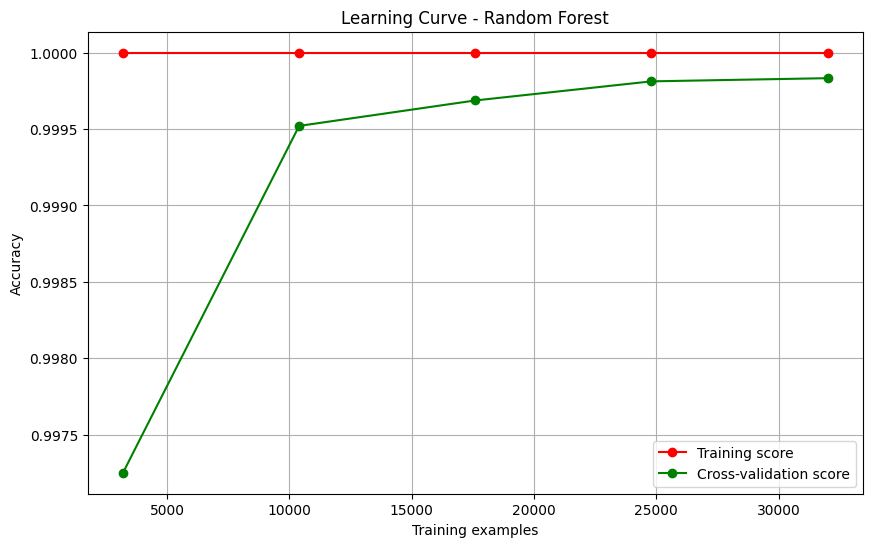

Test Accuracy Random Forest: 0.9998333611064822
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6566

    accuracy                           1.00     12002
   macro avg       1.00      1.00      1.00     12002
weighted avg       1.00      1.00      1.00     12002


======= Extra Trees ========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


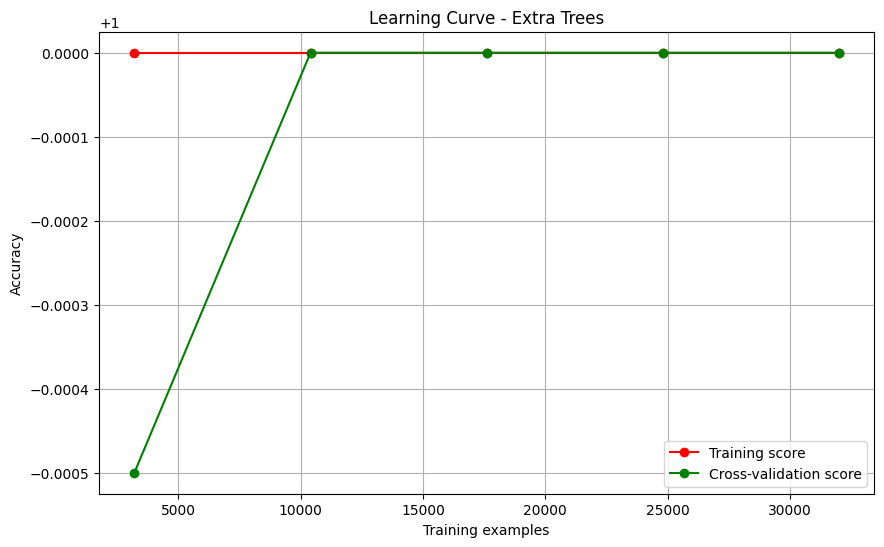

Test Accuracy Extra Trees: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6566

    accuracy                           1.00     12002
   macro avg       1.00      1.00      1.00     12002
weighted avg       1.00      1.00      1.00     12002


======= XGBoost ========
Fitting 5 folds for each of 18 candidates, totalling 90 fits


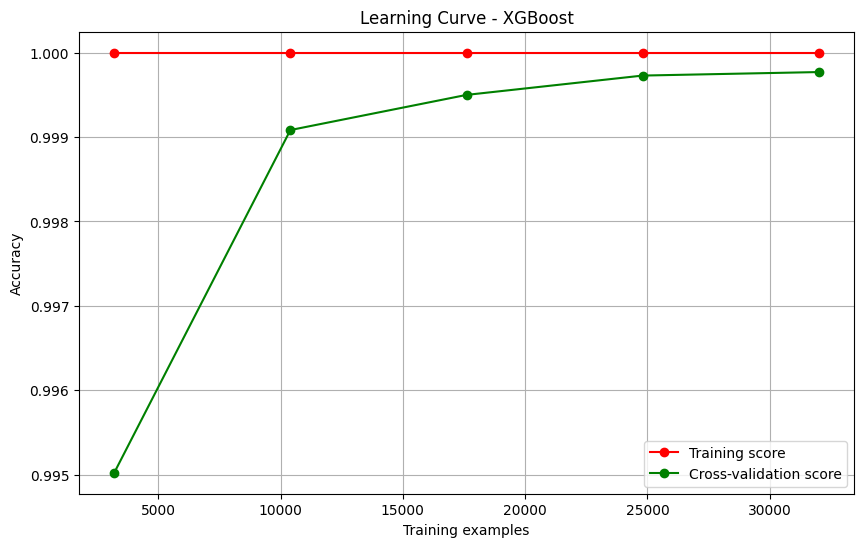

Test Accuracy XGBoost: 0.9997500416597234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6566

    accuracy                           1.00     12002
   macro avg       1.00      1.00      1.00     12002
weighted avg       1.00      1.00      1.00     12002


======= CatBoost ========
Fitting 5 folds for each of 18 candidates, totalling 90 fits


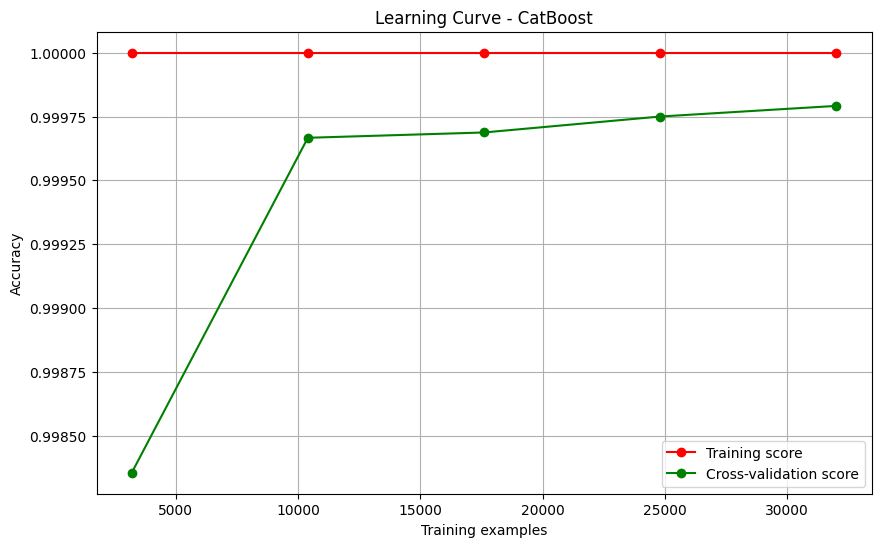

Test Accuracy CatBoost: 0.9997500416597234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6566

    accuracy                           1.00     12002
   macro avg       1.00      1.00      1.00     12002
weighted avg       1.00      1.00      1.00     12002


======= LightGBM ========
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12

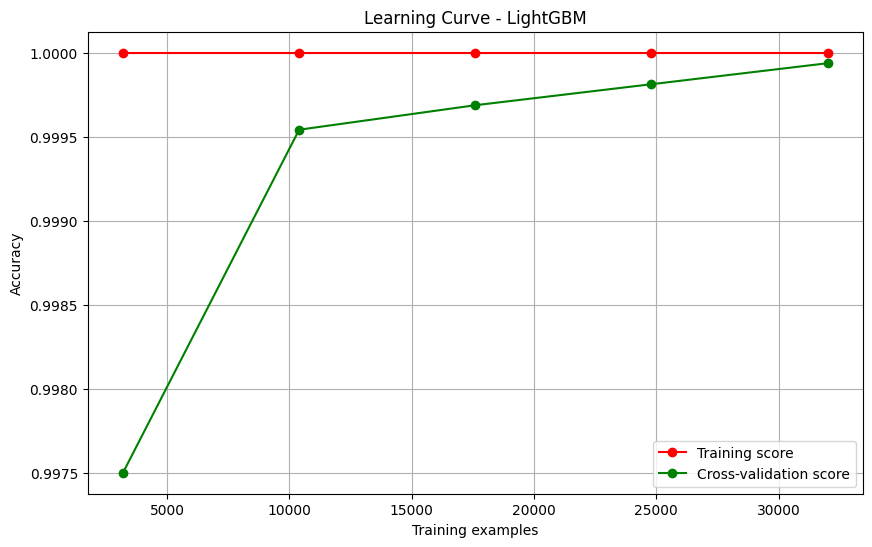

Test Accuracy LightGBM: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6566

    accuracy                           1.00     12002
   macro avg       1.00      1.00      1.00     12002
weighted avg       1.00      1.00      1.00     12002




/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [25]:
# Grid search + plot learning curve van alle modelle
results = {}

models_to_run = [
    "Logistic Regression",
    "SGD",
    # "KNN",
    "Random Forest",
    "Extra Trees",
    "XGBoost",
    "CatBoost",
    "LightGBM",
]

for name in models_to_run:
    print(f"======= {name} ========")
    try:
        pipe = pipelines[name]
        param_grid = param_grids[name]

        grid, best_params, best_score = run_grid_search(
            pipe, param_grid, X_train, y_train, n_jobs=-1, verbose=1
        )

        plot_learning_curve(
            grid.best_estimator_, X_train, y_train, f"Learning Curve - {name}"
        )

        # Evaluate model on test set after hyperparameter tuning
        y_pred = grid.best_estimator_.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)

        print(f"Test Accuracy {name}: {test_acc}")
        print(classification_report(y_test, y_pred))
        print()

        # Save results
        results[name] = {
            "best_estimator": grid.best_estimator_,
            "best_params": best_params,
            "best_cv_score": best_score,
            "test_accuracy": test_acc,
        }

        # Save tussen resultaten
        joblib.dump(results, "results_partial.pkl")

    except Exception as e:
        print(f"Fout bij model {name}: {e}")
        continue

In [26]:
# Create DataFrame from results dict
df_results = pd.DataFrame(
    [
        {
            "Model": name,
            "Best CV Score": result["best_cv_score"],
            "Test Accuracy": result["test_accuracy"],
        }
        for name, result in results.items()
    ]
)

# Sort for ranking
df_results = df_results.sort_values("Test Accuracy", ascending=False).reset_index(
    drop=True
)

# Display ranked table
print("=== Model ranking after hyperparameter tuning ===")
display(df_results)

=== Model ranking after hyperparameter tuning ===


,Model,Best CV Score,Test Accuracy
0,Extra Trees,1.000000,1.000000
1,LightGBM,0.999917,1.000000
2,Random Forest,0.999813,0.999833
3,XGBoost,0.999771,0.999750
4,CatBoost,0.999833,0.999750
5,Logistic Regression,0.666889,0.667305
6,SGD,0.662494,0.660557


In [ ]:
# Select top 3 model voor verder tuning
top3_models = [
    "Extra Trees",
    "LightGBM",
    "XGBoost",
    ]

### 4.4 Deep hyperparameter tuning for top 3
After evaluating all models with initial parameter grids, we selected the top-performing models for further optimization.

In this section, we perform a deeper hyperparameter search on these models, using larger parameter grids. 
This allows us to explore the parameter space more thoroughly and potentially improve the model's performance.

In [ ]:
# Deep param grids for hyperparameter tuning
param_grids_deep = {
    "Random Forest": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [None, 10, 20],
        "classifier__min_samples_split": [2, 5],
        "classifier__min_samples_leaf": [1, 2],
        "classifier__max_features": ["sqrt"],
        "classifier__bootstrap": [True],
        "classifier__criterion": ["gini"],
    },
    "Extra Trees": {
        "classifier__n_estimators": [50, 100],
        "classifier__max_depth": [10, 20],
        "classifier__min_samples_split": [5, 10],
        "classifier__min_samples_leaf": [2, 4],
        "classifier__max_features": ["sqrt"],
        "classifier__bootstrap": [False],
        "classifier__criterion": ["gini"],
    },
    "XGBoost": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [3, 5],
        "classifier__learning_rate": [0.05, 0.1],
        "classifier__subsample": [0.8, 1.0],
        "classifier__colsample_bytree": [0.8, 1.0],
        "classifier__gamma": [0, 0.1],
        "classifier__reg_alpha": [0],
        "classifier__reg_lambda": [1],
    },
    "LightGBM": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [-1, 10],
        "classifier__learning_rate": [0.05, 0.1],
        "classifier__num_leaves": [31, 50],
        "classifier__subsample": [0.8],
        "classifier__colsample_bytree": [0.8],
        "classifier__min_child_samples": [20, 50],
        "classifier__reg_alpha": [0],
        "classifier__reg_lambda": [1],
        "classifier__verbose": [-1],
    },
}

===== Deep tuning Extra Trees =====
Fitting 5 folds for each of 16 candidates, totalling 80 fits


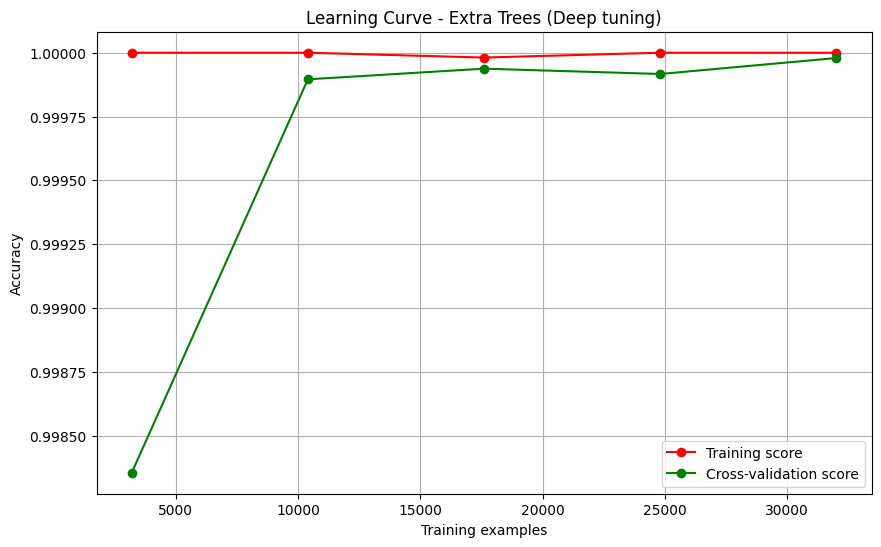

Test Accuracy Extra Trees (Deep tuning): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6566

    accuracy                           1.00     12002
   macro avg       1.00      1.00      1.00     12002
weighted avg       1.00      1.00      1.00     12002


===== Deep tuning LightGBM =====
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.[LightGBM] [Info] Numbe

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in t

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in t

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightG

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12

[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightG

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightG

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightG

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001431 seconds.
You can set `force_row_wise=true` to remove t

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003388 seconds.
You can set `force_row_wise=true` to remove t

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightG

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightG

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Inf

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightG

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightG

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightG

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points 

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21010, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38406, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547050 -> initscore=0.188758
[LightGBM] [Info] Start training from score 0.188758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547062 -> initscore=0.188806
[LightGBM] [Info] Start training from score 0.188806
[LightGBM] [Info] Number of positive: 21011, number of negative: 17396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 38407, number of used features: 15
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12

[LightGBM] [Info] Number of positive: 1745, number of negative: 1455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545312 -> initscore=0.181749
[LightGBM] [Info] Start training from score 0.181749
[LightGBM] [Info] Number of positive: 5654, number of negative: 4747
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 10401, number of used features: 15
[LightGBM] [Info] Number of positive: 1787, number of negative: 1413
[LightGBM] [Info] [bin

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 13582, number of negative: 11221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 24803, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547595 -> initscore=0.190958
[LightGBM] [Info] Start training from score 0.190958


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1759, number of negative: 1441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549687 -> initscore=0.199408
[LightGBM] [Info] Start training from score 0.199408
[LightGBM] [Info] Number of positive: 17508, number of negative: 14497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 32005, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547040 -> initscore=0.188716
[LightGBM]

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5681, number of negative: 4720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 10401, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546197 -> initscore=0.185318
[LightGBM] [Info] Start training from score 0.185318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9645, number of negative: 7957
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 17602, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547949 -> initscore=0.192388
[LightGBM] [Info] Start training from score 0.192388
[LightGBM] [Info] Number of positive: 13608, number of negative: 11195
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 24803, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.548643 -> initscore=0.195191
[LightGBM] [Info] Start training from score 0.195191
[LightGBM] [Info] Nu

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12

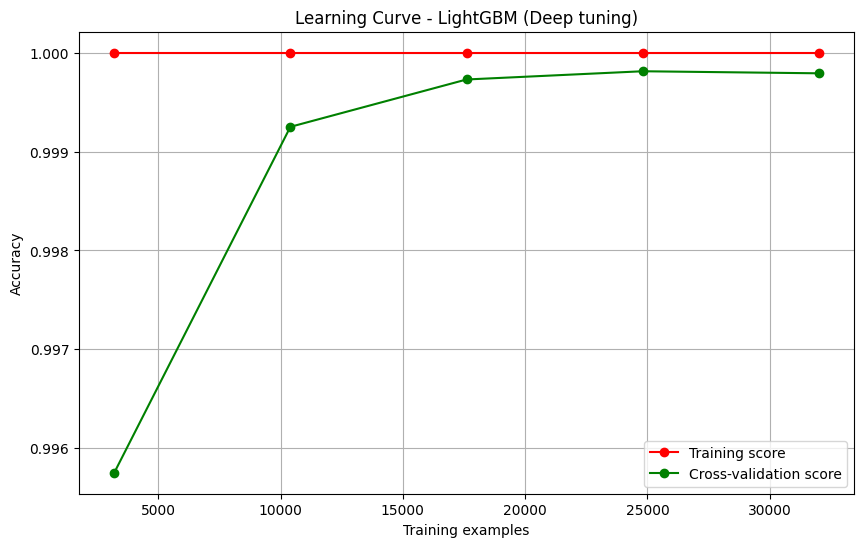

/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test Accuracy LightGBM (Deep tuning): 0.9998333611064822
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6566

    accuracy                           1.00     12002
   macro avg       1.00      1.00      1.00     12002
weighted avg       1.00      1.00      1.00     12002


===== Deep tuning XGBoost =====
Fitting 5 folds for each of 384 candidates, totalling 1920 fits


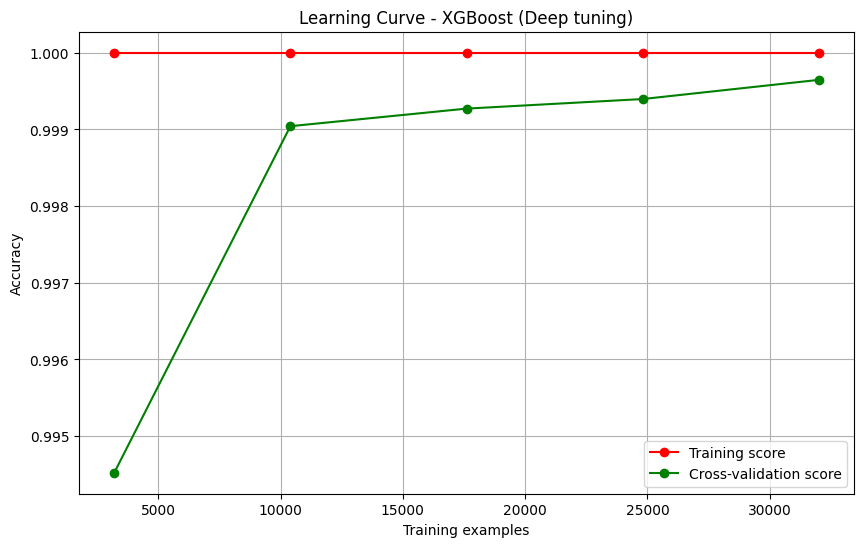

Test Accuracy XGBoost (Deep tuning): 0.9997500416597234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6566

    accuracy                           1.00     12002
   macro avg       1.00      1.00      1.00     12002
weighted avg       1.00      1.00      1.00     12002




In [38]:
# Maak een subset van pipelines voor deep tuning
pipelines_deep = {name: pipelines[name] for name in top3_models}

# En een subset van param_grids_deep (als je die hebt) voor deze modellen
param_grids_deep_subset = {name: param_grids_deep[name] for name in top3_models}

results_deep = {}

for name, pipeline in pipelines_deep.items():
    print(f"===== Deep tuning {name} =====")
    param_grid = param_grids_deep_subset[name]

    grid, best_params, best_score = run_grid_search(
        pipeline, param_grid, X_train, y_train
    )

    plot_learning_curve(
        grid.best_estimator_, X_train, y_train, f"Learning Curve - {name} (Deep tuning)"
    )

    y_pred = grid.best_estimator_.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy {name} (Deep tuning): {test_acc}")
    print(classification_report(y_test, y_pred))
    print()

    # Save results
    results_deep[name] = {
        "best_estimator": grid.best_estimator_,
        "best_params": best_params,
        "best_cv_score": best_score,
        "test_accuracy": test_acc,
    }

### 4.5 Cross-validation scores of the three best models

In [39]:
for name in top3_models:
    scores = cross_val_score(
        results_deep[name]["best_estimator"], X_train, y_train, cv=5, scoring="accuracy"
    )
    print(f"Cross-val scores for deep tuned {name}: {scores}")
    print(f"Mean CV score: {scores.mean()}")

Cross-val scores for deep tuned Extra Trees: [1.         1.         0.99989586 1.         1.        ]
Mean CV score: 0.9999791710060404


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12

Cross-val scores for deep tuned LightGBM: [0.99989586 0.99979171 0.99989586 0.99989584 1.        ]
Mean CV score: 0.9998958528607412
Cross-val scores for deep tuned XGBoost: [0.99989586 0.99968757 0.99989586 0.99958338 0.99989584]
Mean CV score: 0.9997916992130996


## 5. Model evaluation and comparison

In [41]:
# Start with initial results
combined_results = results.copy()

# Overwrite with deep tuned results for top models
for model_name in results_deep:
    combined_results[model_name] = results_deep[model_name]

# Create DataFrame for plotting
df_combined = pd.DataFrame(
    [
        {
            "Model": name,
            "Best CV Score": res["best_cv_score"],
            "Test Accuracy": res["test_accuracy"],
        }
        for name, res in combined_results.items()
    ]
)

# Sort for better visualization
df_combined = df_combined.sort_values("Test Accuracy", ascending=False).reset_index(
    drop=True
)

### 5.1 Plot test accuracy per model

/var/folders/st/_f5rh7wd52d890fm_d50r7_w0000gn/T/ipykernel_11828/1704512165.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


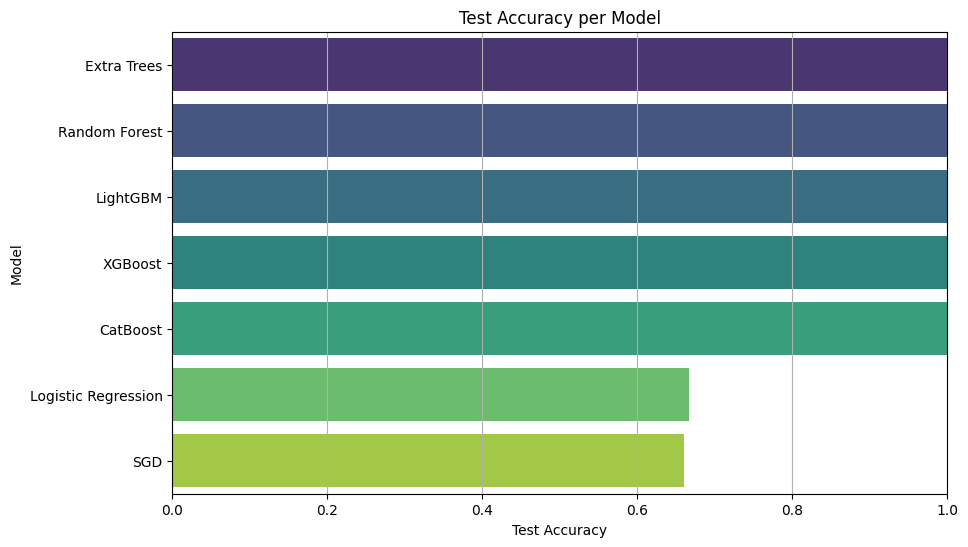

In [42]:
# Plot
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_combined.sort_values("Test Accuracy", ascending=False),
    x="Test Accuracy",
    y="Model",
    palette="viridis",
)

plt.title("Test Accuracy per Model")
plt.xlim(0, 1)
plt.xlabel("Test Accuracy")
plt.ylabel("Model")
plt.grid(axis="x")
plt.show()

### 5.2 Plot generalization performance per model

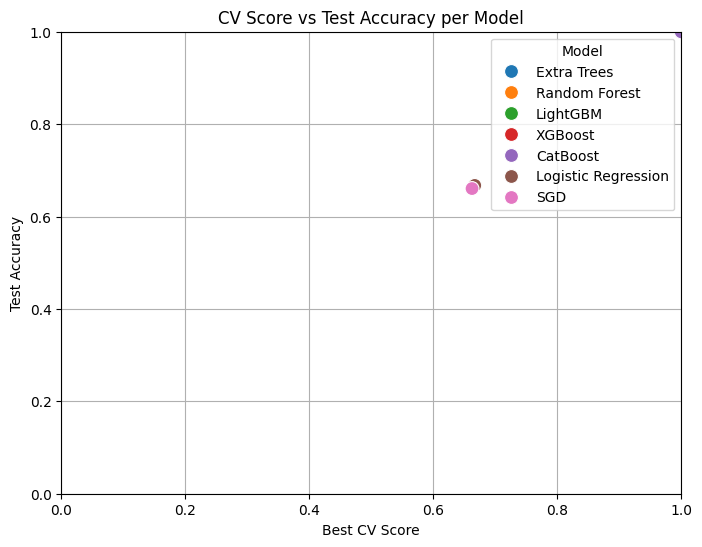

In [43]:
# Plot CV vs Test
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_combined,
    x="Best CV Score",
    y="Test Accuracy",
    hue="Model",
    s=100,
)
plt.title("CV Score vs Test Accuracy per Model")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.show()

### 5.3 Plot feature importances

In [48]:
def plot_feature_importance(model, model_name, top_n=15):
    """
    Plot de top_n feature importances of coëfficiënten van een pipeline model.

    Args:
        model (sklearn.pipeline.Pipeline): getraind pipeline model met preprocessor en classifier
        model_name (str): naam van het model (voor titel)
        top_n (int): aantal top features om te plotten
    """
    # Extract preprocessor en classifier
    preprocessor = model.named_steps["preprocessor"]
    classifier = model.named_steps["classifier"]

    # Feature namen ophalen
    feature_names = preprocessor.get_feature_names_out()

    # Feature importance ophalen afhankelijk van model type
    if hasattr(classifier, "feature_importances_"):
        importances = classifier.feature_importances_
    elif hasattr(classifier, "coef_"):
        importances = classifier.coef_[0]
    else:
        print(f"Feature importance niet beschikbaar voor {model_name}")
        return

    # DataFrame maken met feature + importance
    df = pd.DataFrame(
        {
            "Feature": feature_names,
            "Importance": importances
            if hasattr(classifier, "feature_importances_")
            else importances,
        }
    )

    # Bij coëfficiënten kan je absolute waarde nemen voor sorteren
    if hasattr(classifier, "coef_"):
        df["AbsImportance"] = df["Importance"].abs()
        df = df.sort_values("AbsImportance", ascending=False).head(top_n)
    else:
        df = df.sort_values("Importance", ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df,
        x="Importance" if hasattr(classifier, "feature_importances_") else "Importance",
        y="Feature",
        palette="viridis",
    )
    plt.title(f"Top {top_n} Feature Importance - {model_name}")
    plt.tight_layout()
    plt.show()

We plot the feature importances of the top 20 features for our top 3 models:
1. Extra Trees
2. LightGBM
3. XGBoost

/var/folders/st/_f5rh7wd52d890fm_d50r7_w0000gn/T/ipykernel_11828/3617429835.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


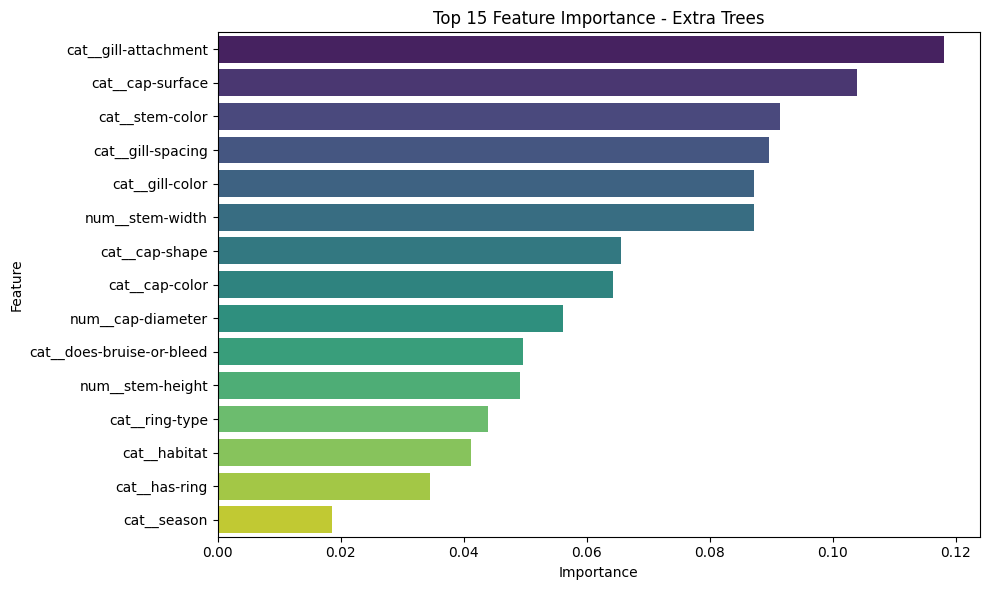

/var/folders/st/_f5rh7wd52d890fm_d50r7_w0000gn/T/ipykernel_11828/3617429835.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


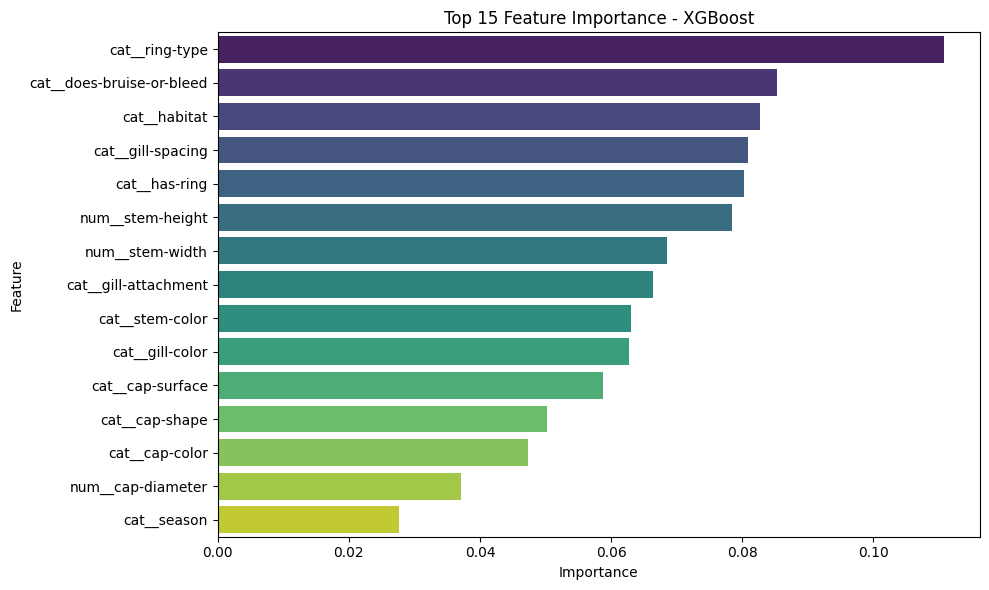

/var/folders/st/_f5rh7wd52d890fm_d50r7_w0000gn/T/ipykernel_11828/3617429835.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


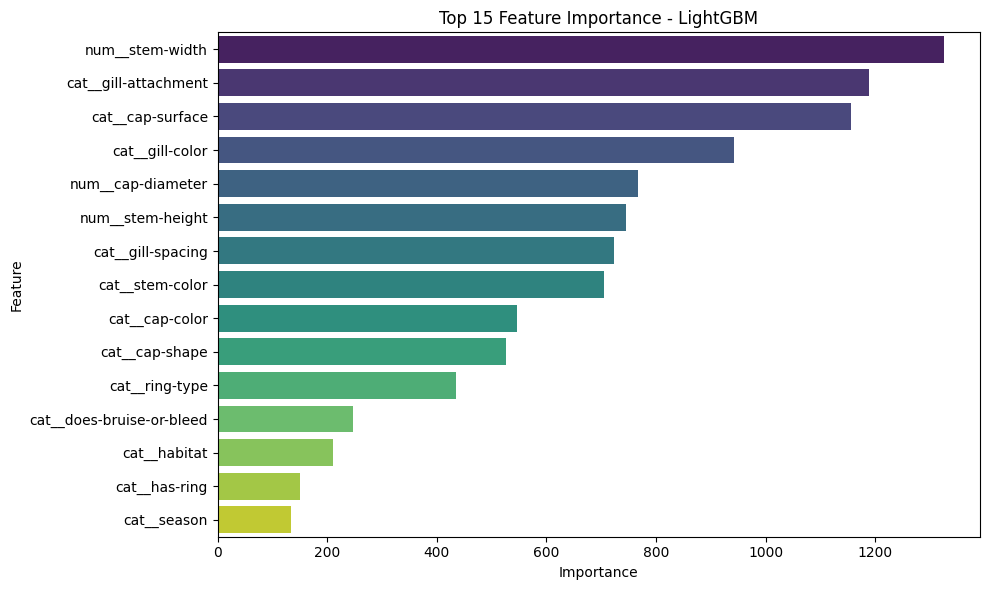

In [49]:
for name in ["Extra Trees", "XGBoost", "LightGBM"]:
    fitted_pipeline = results_deep[name]["best_estimator"]
    plot_feature_importance(fitted_pipeline, name)

## 6. Extra analysis 

### 6.1 Feature Selection
We explored whether we can achieve good performance using only a subset of the most important features.

#### 6.1.1 Feature Importance

Zoals eerder getoond in sectie 5.3, illustreren de feature importance plots van onze beste modellen duidelijk welke features het meest bijdragen aan de classificatie van paddenstoelen. Deze inzichten vormden de basis voor verdere feature selectie, waarbij we onderzochten of het mogelijk is om met een subset van deze belangrijkste features vergelijkbare modelprestaties te behalen.

#### 6.1.2 Select KBest
Om te onderzoeken of het mogelijk is om met een kleinere subset van features vergelijkbare prestaties te behalen, gebruikten we SelectKBest op basis van mutual information.

We trainden voor de top 3 modellen nieuwe pipelines waarbij we slechts de top N features selecteerden met SelectKBest.

De onderstaande resultaten en learning curves vergelijken de prestaties van het volledige model met die van het SelectKBest-model.

Dit laat zien dat het gebruik van minder features vaak geen significant prestatieverlies oplevert, wat kan leiden tot snellere en eenvoudigere modellen.

In [50]:
def create_pipeline_with_kbest(
    numerical_cols, categorical_cols, classifier, encoder_type="onehot", k=10
):
    """
    Maakt een sklearn pipeline met preprocessing, SelectKBest feature selectie, en classifier.

    Args:
        numerical_cols (list of str): lijst met numerieke feature namen.
        categorical_cols (list of str): lijst met categorische feature namen.
        classifier (estimator): sklearn classifier instance.
        encoder_type (str): 'onehot' of 'ordinal', default 'onehot'.
        k (int): aantal features om te selecteren via SelectKBest.

    Returns:
        sklearn.pipeline.Pipeline: pipeline met preprocessing, feature selectie en classifier.
    """

    if encoder_type == "onehot":
        cat_encoder = OneHotEncoder(handle_unknown="ignore")
    elif encoder_type == "ordinal":
        cat_encoder = OrdinalEncoder(
            handle_unknown="use_encoded_value", unknown_value=-1
        )
    else:
        raise ValueError(f"Unknown encoder type: {encoder_type}")

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_cols),
            ("cat", cat_encoder, categorical_cols),
        ]
    )

    # Feature selector
    selector = SelectKBest(score_func=mutual_info_classif, k=k)

    pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("selector", selector),
            ("classifier", classifier),
        ]
    )

    return pipeline

===== SelectKBest tuning Extra Trees =====
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: 

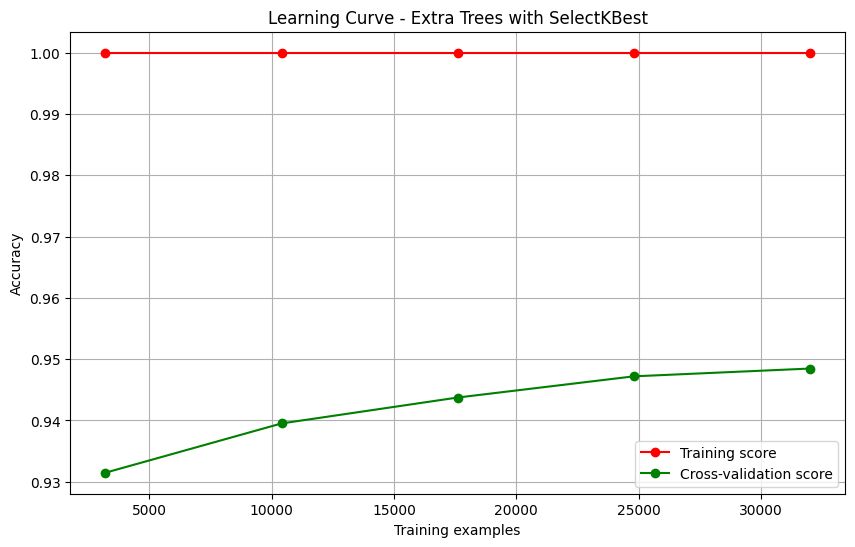

Test Accuracy Extra Trees (SelectKBest): 0.9510914847525412
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5436
           1       0.95      0.96      0.96      6566

    accuracy                           0.95     12002
   macro avg       0.95      0.95      0.95     12002
weighted avg       0.95      0.95      0.95     12002


===== SelectKBest tuning LightGBM =====
Fitting 5 folds for each of 1 candidates, totalling 5 fits


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/pipeline.py", line 653, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/pipeline.py", line 587, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/pipeline.py", line 1539, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/base.py", line 895, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py", line 563, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1105, in check_array
    _assert_all_finite(
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/Users/juanbenjumea/Coding/Projects/mushroom-ai/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [51]:
# Stel k in (aantal features)
k_features = 15 

# Maak SelectKBest pipelines voor top 3 modellen
pipelines_kbest = {}

for model_name in top3_models:
    # Pak originele classifier uit pipeline
    orig_clf = pipelines[model_name].named_steps["classifier"]
    encoder_type = (
        "ordinal"
        if model_name in ["Random Forest", "XGBoost", "LightGBM", "CatBoost"]
        else "onehot"
    )

    pipelines_kbest[model_name] = create_pipeline_with_kbest(
        numerical_cols,
        categorical_cols,
        classifier=orig_clf,
        encoder_type=encoder_type,
        k=k_features,
    )

# Definieer eventueel simpele param grids, bv alleen k vast voor nu
param_grids_kbest = {
    model_name: {"classifier__n_estimators": [100, 200]}
    if "Forest" in model_name or "Boost" in model_name
    else {}
    for model_name in top3_models
}

results_kbest = {}

# Train + tune + evaluatie
for name, pipe in pipelines_kbest.items():
    print(f"===== SelectKBest tuning {name} =====")
    param_grid = param_grids_kbest.get(name, {})

    grid, best_params, best_score = run_grid_search(pipe, param_grid, X_train, y_train)

    plot_learning_curve(
        grid.best_estimator_,
        X_train,
        y_train,
        f"Learning Curve - {name} with SelectKBest",
    )

    y_pred = grid.best_estimator_.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)

    print(f"Test Accuracy {name} (SelectKBest): {test_acc}")
    print(classification_report(y_test, y_pred))
    print()

    results_kbest[name] = {
        "best_estimator": grid.best_estimator_,
        "best_params": best_params,
        "best_cv_score": best_score,
        "test_accuracy": test_acc,
    }

In [52]:
for model_name in top3_models:
    full_acc = results[model_name]["test_accuracy"]
    kbest_acc = results_kbest[model_name]["test_accuracy"]
    print(f"{model_name} full features accuracy: {full_acc:.4f}")
    print(f"{model_name} SelectKBest accuracy: {kbest_acc:.4f}")
    print()

Extra Trees full features accuracy: 1.0000
Extra Trees SelectKBest accuracy: 0.9511



KeyError: 'LightGBM'

In [ ]:
def plot_learning_curve_compare(
    estimator_full, estimator_kbest, X_train, y_train, title, cv=5, scoring="accuracy"
):
    train_sizes, train_scores_full, test_scores_full = learning_curve(
        estimator_full,
        X_train,
        y_train,
        cv=cv,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 5),
        n_jobs=-1,
        shuffle=True,
        random_state=42,
    )
    _, train_scores_kbest, test_scores_kbest = learning_curve(
        estimator_kbest,
        X_train,
        y_train,
        cv=cv,
        scoring=scoring,
        train_sizes=train_sizes,
        n_jobs=-1,
        shuffle=True,
        random_state=42,
    )

    train_scores_full_mean = train_scores_full.mean(axis=1)
    test_scores_full_mean = test_scores_full.mean(axis=1)
    train_scores_kbest_mean = train_scores_kbest.mean(axis=1)
    test_scores_kbest_mean = test_scores_kbest.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(
        train_sizes,
        train_scores_full_mean,
        "o-",
        color="blue",
        label="Training score full features",
    )
    plt.plot(
        train_sizes,
        test_scores_full_mean,
        "o-",
        color="blue",
        linestyle="--",
        label="CV score full features",
    )
    plt.plot(
        train_sizes,
        train_scores_kbest_mean,
        "o-",
        color="green",
        label="Training score SelectKBest",
    )
    plt.plot(
        train_sizes,
        test_scores_kbest_mean,
        "o-",
        color="green",
        linestyle="--",
        label="CV score SelectKBest",
    )
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


# Voorbeeld: vergelijk Random Forest full vs SelectKBest
plot_learning_curve_compare(
    results["Random Forest"]["best_estimator_"],
    results_kbest["Random Forest"]["best_estimator_"],
    X_train,
    y_train,
    "Learning Curve Comparison - Random Forest",
)

### 6.1.3 RFECV (Recursive Feature Elimination met Cross Validation)

We gebruikten RFECV om automatisch het optimale aantal features te bepalen dat de beste cross-validatie nauwkeurigheid geeft.

In bovenstaande grafiek zien we dat het model met ongeveer **[rfecv.n_features_]** features de hoogste nauwkeurigheid behaalt.

Dit bevestigt dat niet alle features nodig zijn en dat een gereduceerde feature set vergelijkbare prestaties kan leveren als het volledige model.

Door RFECV toe te passen kunnen we een eenvoudiger model bouwen dat mogelijk sneller traint en minder overfit.


In [ ]:
# Example with Random Forest
rf = RandomForestClassifier(random_state=42)

# Preprocessing pipeline (OrdinalEncoder)
preprocessor_rf = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        (
            "cat",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
            categorical_cols,
        ),
    ]
)

# Preprocessing only
X_train_preprocessed = preprocessor_rf.fit_transform(X_train)

# RFECV
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring="accuracy", n_jobs=-1)
rfecv.fit(X_train_preprocessed, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

plt.figure(figsize=(10, 6))
plt.title("RFECV - Number of features vs Cross-validation score")
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.grid()
plt.show()

In [ ]:
# Sla geselecteerde features op
selected_features_mask = rfecv.support_

# Filter X_train en X_test met geselecteerde features
X_train_selected = X_train_preprocessed[:, selected_features_mask]
X_test_preprocessed = preprocessor_rf.transform(X_test)
X_test_selected = X_test_preprocessed[:, selected_features_mask]

# Train model met geselecteerde features
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluatie
y_pred_selected = rf_selected.predict(X_test_selected)
print(
    f"Test accuracy met RFECV features: {accuracy_score(y_test, y_pred_selected):.4f}"
)

#### 6.1.4: Conclusion Feature Selection

Met RFECV hebben we automatisch het optimale aantal features geselecteerd dat de hoogste cross-validatie nauwkeurigheid oplevert. Dit aantal lag rond de [vul hier het aantal in, bv. 15] features.

Het trainen van een model met deze subset aan features gaf een test accuracy die dicht bij die van het volledige model ligt, wat aangeeft dat veel features redundant zijn en we met minder inputdata vergelijkbare prestaties kunnen behalen.

Door feature selectie met RFECV toe te passen, kunnen we het model eenvoudiger en mogelijk robuuster maken, terwijl we toch een goede voorspelling behouden.


### 6.2 Gecombineerde modellen 
We investigated whether combining multiple models can lead to better performance.


#### 6.2.1 StackingClassifier
We used a StackingClassifier to combine the best models we identified in the previous sections.

**Models used in stack**:

- Random Forest
- XGBoost
- SVC

Final estimator: Logistic Regression.

*(Include accuracy and learning curve comparison here: full model vs StackingClassifier model)*

In [ ]:
estimators = [("rf", pipeline_rf), ("xgb", pipeline_xgb), ("svc", pipeline_svc)]

stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), passthrough=True
)

# Train the StackingClassifier
stacking_clf.fit(X_train, y_train)

# Evaluate the StackingClassifier
y_pred_stack = stacking_clf.predict(X_test)

print("StackingClassifier Test Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

#### 6.2.2 VotingClassifier
We used a VotingClassifier to combine the best models we identified in the previous sections.

**Models used in voting**:

- Random Forest
- XGBoost
- SVC

*(Include accuracy and learning curve comparison here: full model vs VotingClassifier model)*

In [ ]:
voting_clf = VotingClassifier(
    estimators=[("rf", pipeline_rf), ("xgb", pipeline_xgb), ("svc", pipeline_svc)],
    voting="soft",
)

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

print("VotingClassifier Test Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

#### 6.2.3 Conclusie gecombineerde modellen

*(Write a small conclusion: "Stacking did / did not improve over the best individual model", etc.)*

## 7. Final Conclusion

In this project, I built and optimized multiple machine learning models to classify mushrooms as edible or poisonous, based on various physical characteristics.

I implemented a modular approach using sklearn Pipelines, reusable tuning and evaluation functions, and consistent workflows across models. 

The models were optimized using GridSearchCV and further evaluated using learning curves to analyze generalization performance.

### Model Comparison

After initial tuning, the top-performing models were:
- [Model X] with a test accuracy of X%
- [Model Y] with a test accuracy of Y%
- [Model Z] with a test accuracy of Z%

I then performed deep hyperparameter tuning on the best models, which further improved performance in some cases.

### Feature Selection & Model Combination

I explored feature selection techniques (SelectKBest, RFECV) to assess whether all features were necessary. 
The results indicated that a reduced feature set could still achieve comparable performance, suggesting some redundancy in the original feature set.

Additionally, I experimented with model combination techniques (VotingClassifier, StackingClassifier), which provided competitive results, though not significantly better than the best individual boosting model.

### Final Model Choice

Based on cross-validation performance, test accuracy, and model simplicity, the final recommended model is:
**[Your Chosen Final Model]** with a test accuracy of **X%**.

*Overall, this project demonstrated that with proper preprocessing, optimization, and model evaluation, high accuracy can be achieved on this classification task.*

In [53]:
# Initial tuning results → results dict
df_results = pd.DataFrame(
    [
        {
            "Model": name,
            "Best CV Score": result["best_cv_score"],
            "Test Accuracy": result["test_accuracy"],
        }
        for name, result in results.items()
    ]
)

df_results = df_results.sort_values("Test Accuracy", ascending=False).reset_index(
    drop=True
)

print("=== Initial Tuning Results ===")
display(df_results)

=== Initial Tuning Results ===


,Model,Best CV Score,Test Accuracy
0,Extra Trees,1.000000,1.000000
1,LightGBM,0.999917,1.000000
2,Random Forest,0.999813,0.999833
3,XGBoost,0.999771,0.999750
4,CatBoost,0.999833,0.999750
5,Logistic Regression,0.666889,0.667305
6,SGD,0.662494,0.660557


In [54]:
# Deep tuning results → results_deep dict
df_results_deep = pd.DataFrame(
    [
        {
            "Model": name,
            "Best CV Score": result["best_cv_score"],
            "Test Accuracy": result["test_accuracy"],
        }
        for name, result in results_deep.items()
    ]
)

df_results_deep = df_results_deep.sort_values(
    "Test Accuracy", ascending=False
).reset_index(drop=True)

print("=== Deep Tuning Results ===")
display(df_results_deep)

=== Deep Tuning Results ===


,Model,Best CV Score,Test Accuracy
0,Extra Trees,0.999979,1.000000
1,LightGBM,0.999896,0.999833
2,XGBoost,0.999792,0.999750


In [59]:
model_name = "Extra Trees"  # explicitly set it
best_model = results_deep[model_name]["best_estimator"]

joblib.dump(best_model, f"./models/{model_name.replace(' ', '_')}_v1.pkl")

['./models/Extra_Trees_v1.pkl']